<a href="https://colab.research.google.com/github/uditsaini1111/decisiontree_rf/blob/main/winedata_using_decisiontree_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WineQT.csv')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.shape

(1143, 12)

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [ ]:
a = df.corr()
a = a[(a>0.8) & (a!=1)]
a

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

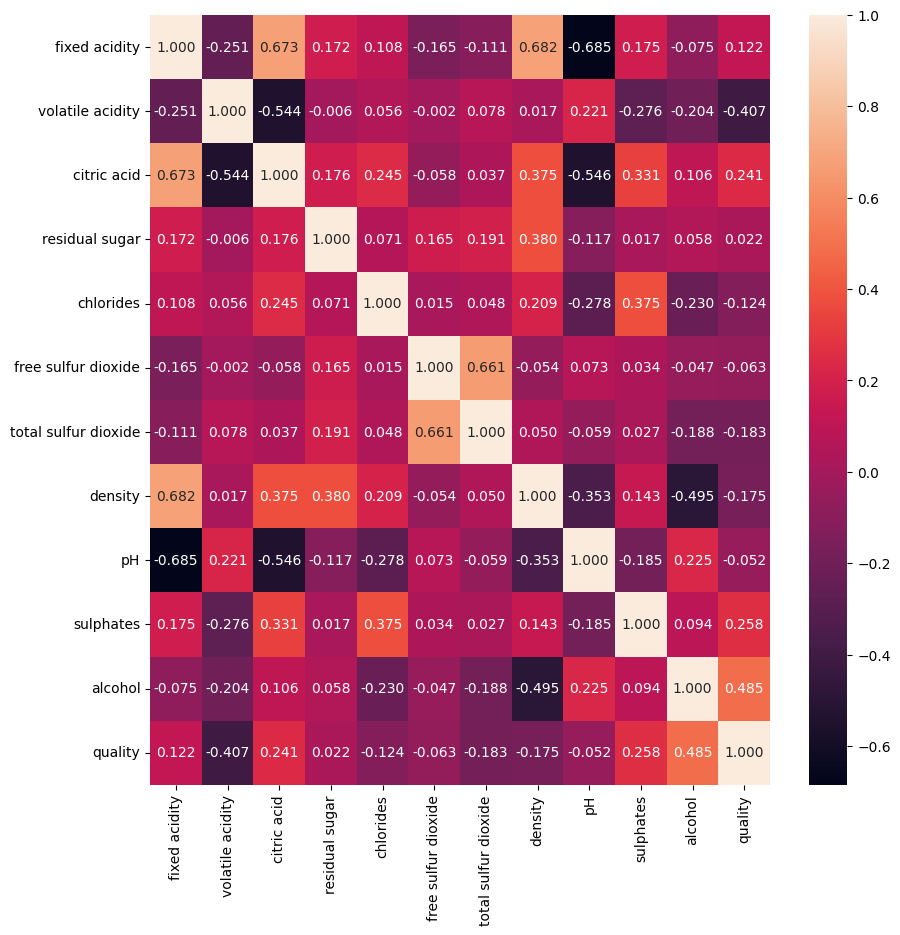

In [ ]:
fig= plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, fmt='.3f')

<Axes: >

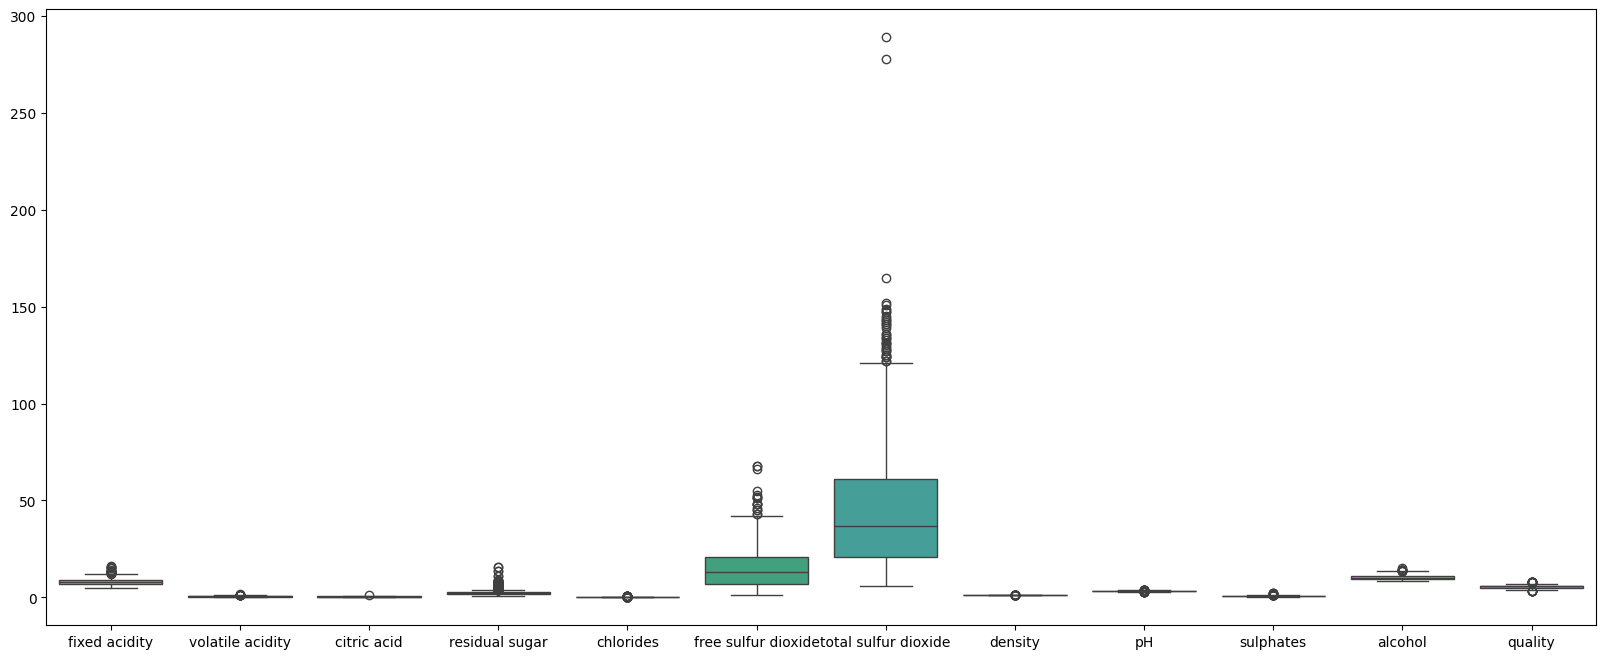

In [ ]:
fig= plt.subplots(figsize=(20,8))
sns.boxplot(data = df)

In [ ]:
len(df.columns)


12

/tmp/ipython-input-170-869082870.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j], ax=axs[i])
/tmp/ipython-input-170-869082870.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j], ax=axs[i])
/tmp/ipython-input-170-869082870.py:3: UserWarning: 

`distplot` is a deprecated function 

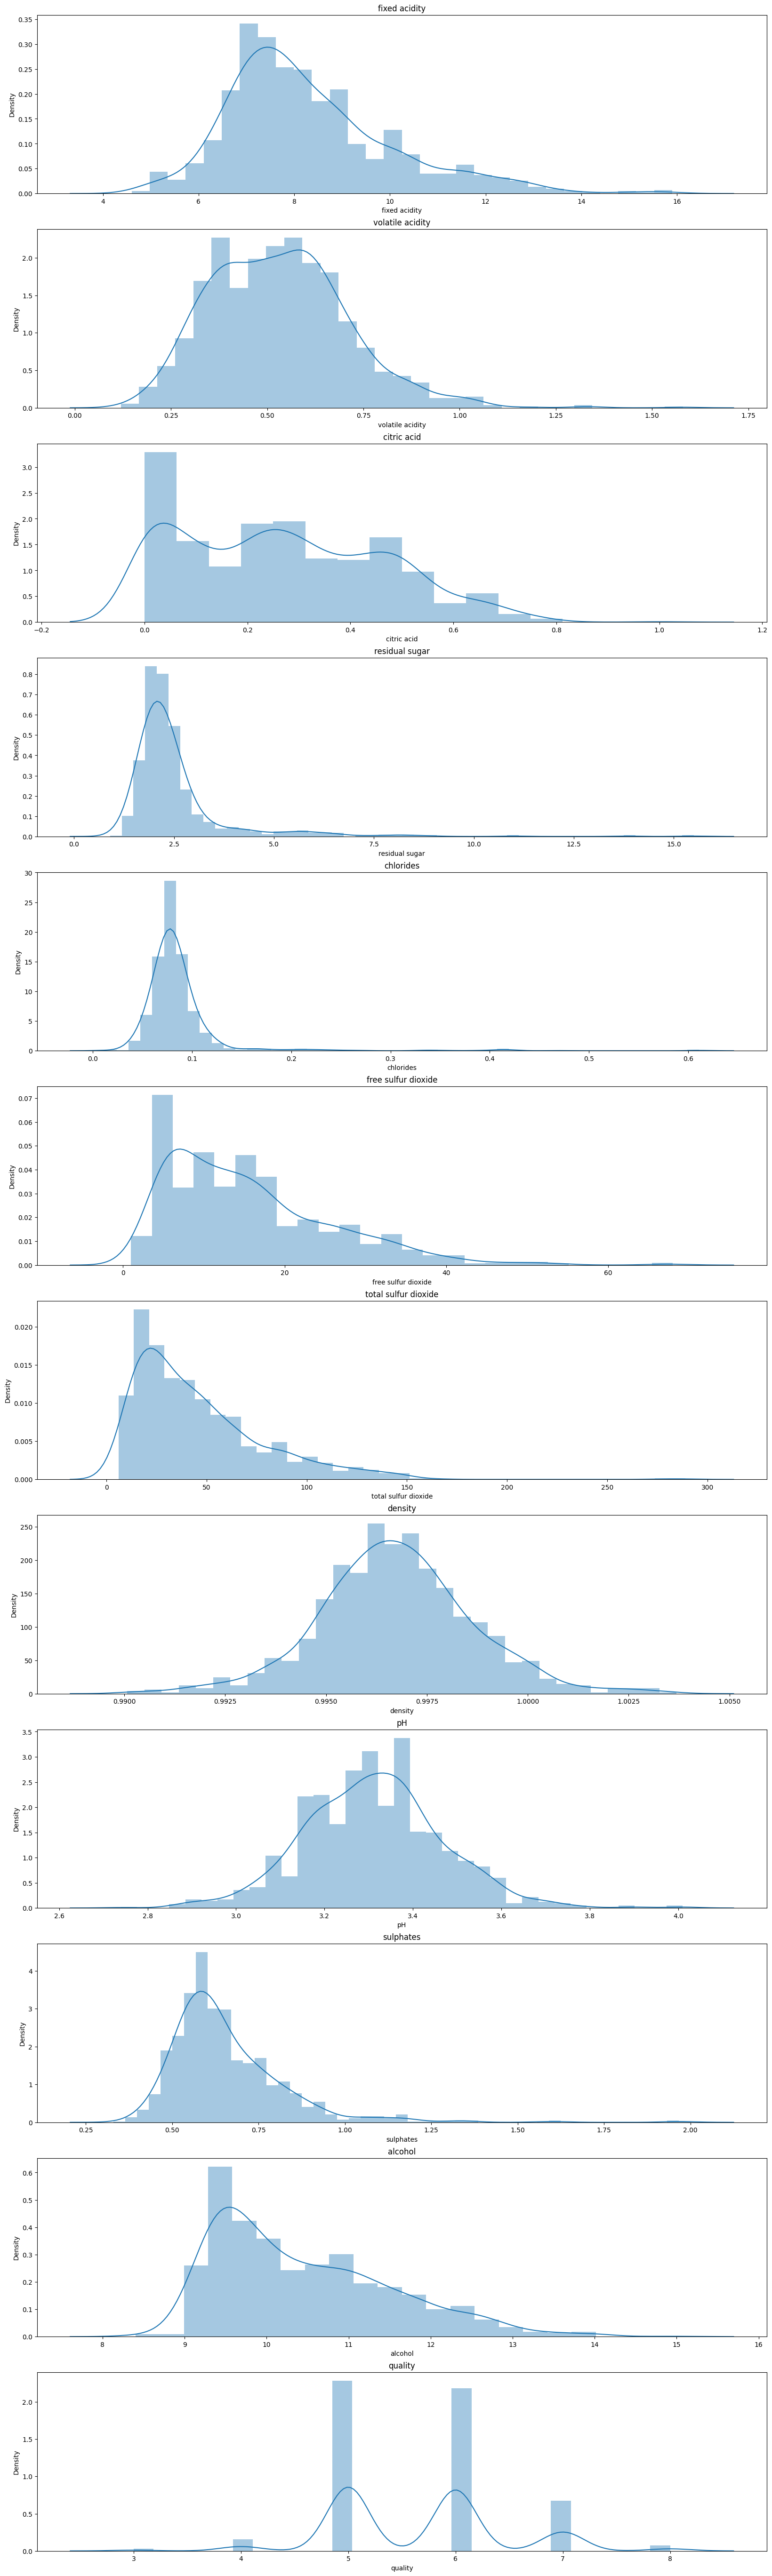

In [ ]:
fig, axs = plt.subplots(12,1,figsize=(20,70))
for i, j in enumerate(df.columns):
  sns.distplot(df[j], ax=axs[i])
  axs[i].set_title(j)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
for i in x.columns:
  Q1 = x[i].quantile(0.25)
  Q3 = x[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mask = (x[i] >= lower_bound) & (x[i] <= upper_bound)

In [ ]:
x_1=x[mask]
y_1=y[mask]

In [ ]:
x_1.shape

(1131, 11)

<Axes: >

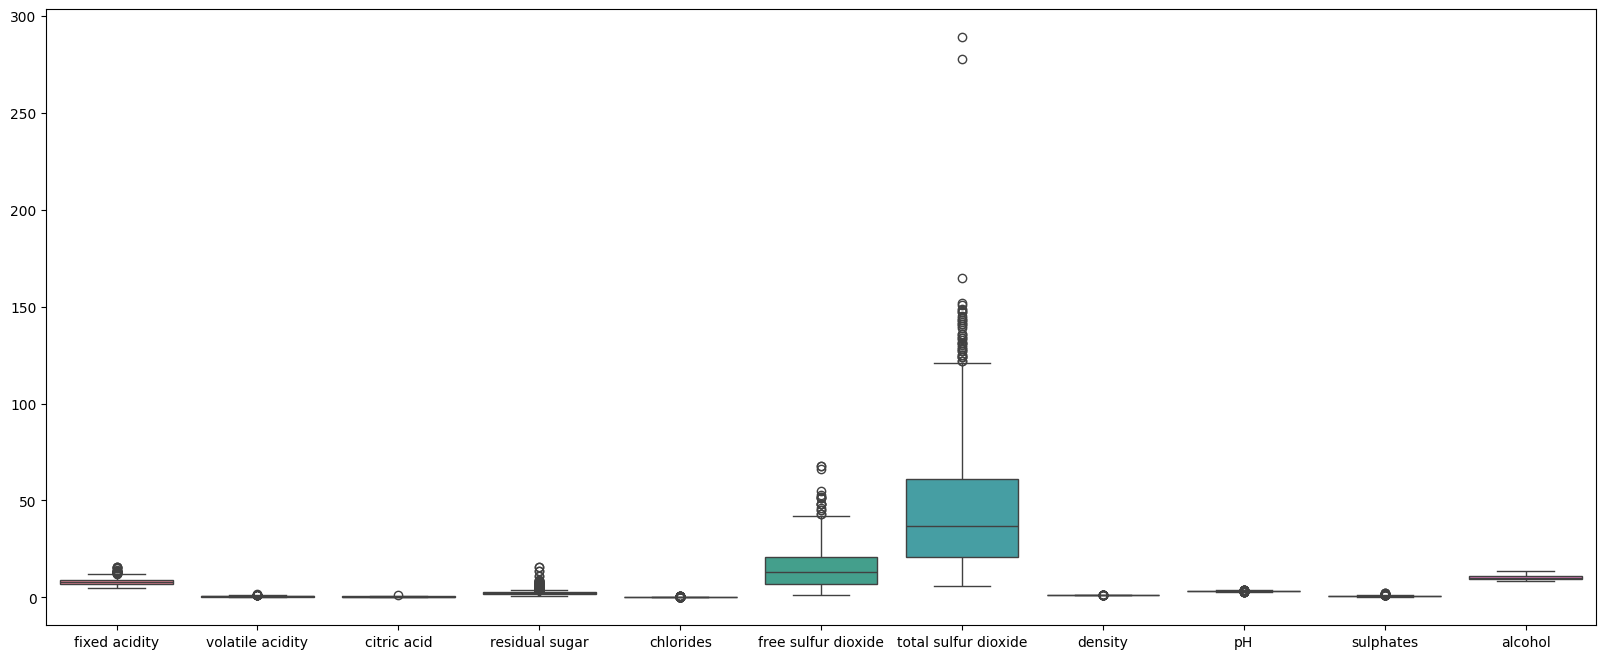

In [ ]:
fig= plt.subplots(figsize=(20,8))
sns.boxplot(data = x_1)

In [ ]:
x_2=x_1[(x_1['total sulfur dioxide'])<(x_1['total sulfur dioxide'].quantile(.98))]
y_2=y_1[(x_1['total sulfur dioxide'])<(x_1['total sulfur dioxide'].quantile(.98))]

<Axes: >

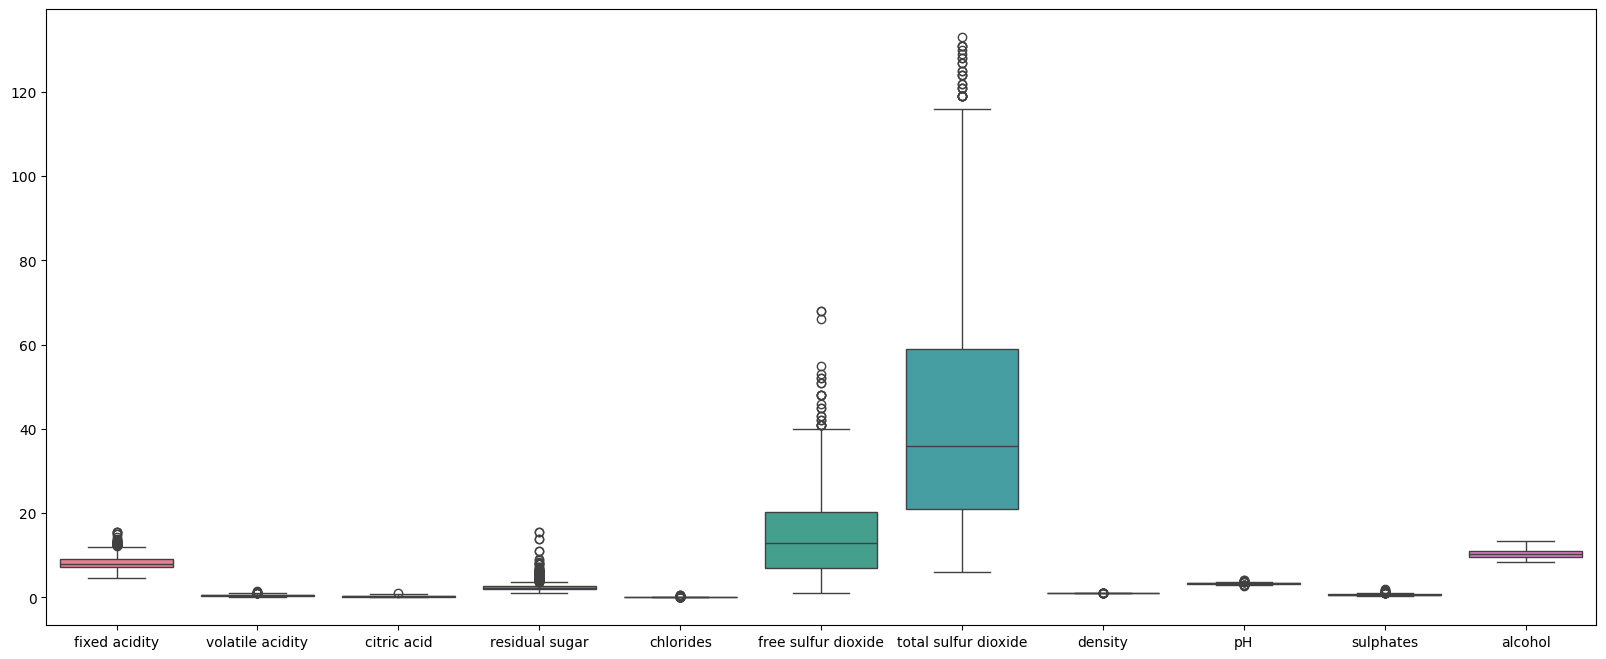

In [ ]:
fig= plt.subplots(figsize=(20,8))
sns.boxplot(data = x_2)

In [ ]:
x_2.shape

(1108, 11)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_1=scaler.fit_transform(x_train)
x_test_1=scaler.transform(x_test)

<Axes: >

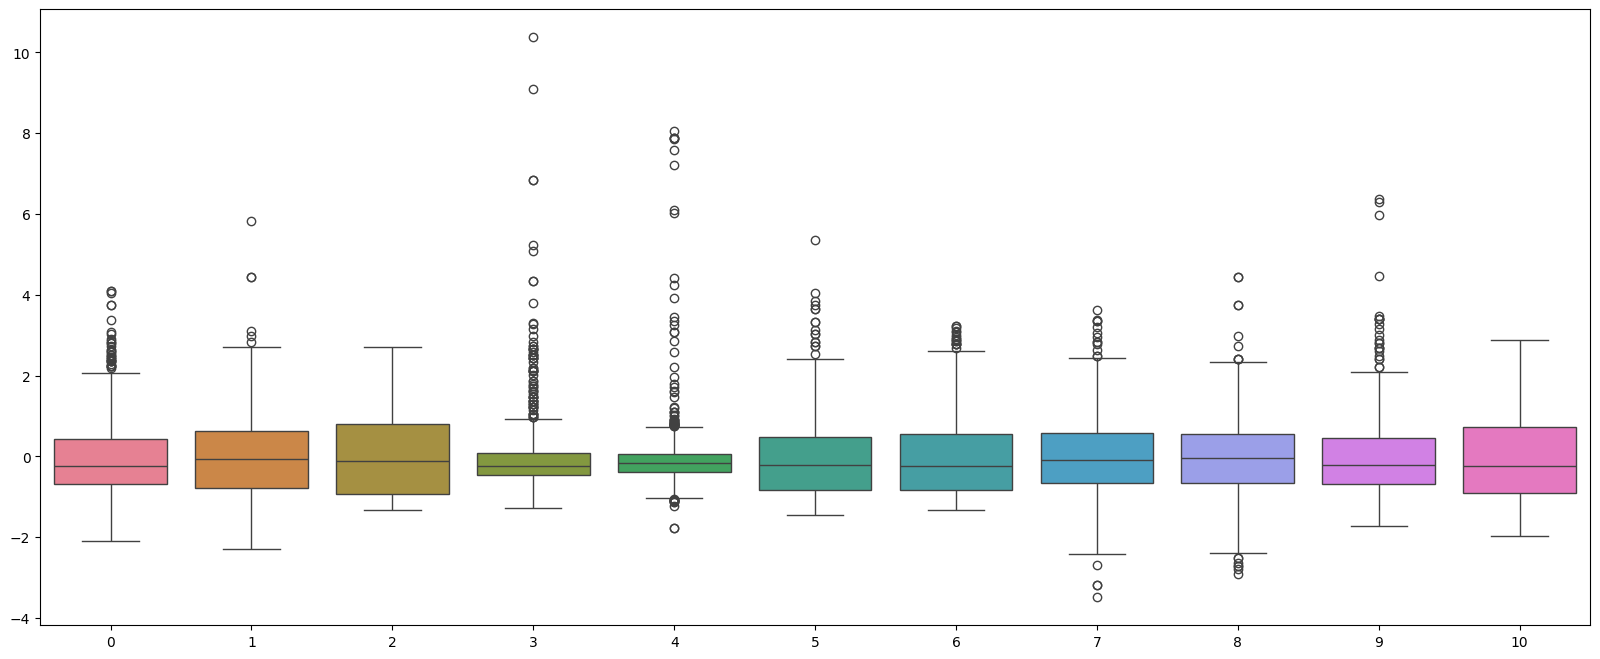

In [ ]:
fig= plt.subplots(figsize=(20,8))
sns.boxplot(data = x_train_1)

In [ ]:
y.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
y_train.value_counts()

,count
quality,
6,330
5,322
7,91
4,19
8,8
3,5


In [ ]:
from imblearn.over_sampling import RandomOverSampler
smote = RandomOverSampler(random_state=42)
x_train_2, y_train_2 = smote.fit_resample(x_train_1, y_train)

In [ ]:
y_train_2.value_counts()

,count
quality,
6,330
5,330
7,330
8,330
4,330
3,330


In [ ]:
from sklearn.tree import DecisionTreeClassifier
m1 = DecisionTreeClassifier()

In [ ]:
m1.fit(x_train_2, y_train_2)

DecisionTreeClassifier()

In [ ]:
p_1=m1.predict(x_test_1)

In [ ]:
p_1

array([6, 5, 5, 6, 5, 7, 6, 7, 7, 6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 7, 6, 6, 6, 7, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5,
       7, 5, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 6, 7, 5, 6, 5, 5, 5, 3,
       6, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 7, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5,
       6, 5, 7, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 5, 6, 5,
       5, 7, 5, 6, 5, 5, 6, 6, 6, 5, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 7, 5,
       4, 6, 5, 7, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5,
       5, 6, 6, 5, 7, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5, 6, 6,
       5, 7, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 5, 5, 6, 6,
       6, 6, 6, 6, 7, 5, 5, 5, 5, 5, 5, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 7, 6, 6, 5, 7, 6, 6, 6, 6, 4, 6, 6, 6, 5, 5, 5, 6,
       6, 6, 4, 5, 5, 5, 5, 7, 6, 6, 5, 4, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7,
       6, 5, 5, 5, 8, 6, 6, 5, 5, 6, 6, 6, 7, 6, 7,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p_1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.07      0.11        14
           5       0.65      0.68      0.67       144
           6       0.52      0.58      0.55       122
           7       0.47      0.40      0.43        45
           8       0.00      0.00      0.00         7

    accuracy                           0.56       333
   macro avg       0.31      0.29      0.29       333
weighted avg       0.54      0.56      0.55       333



In [ ]:
m1.feature_importances_

array([0.06973216, 0.1642471 , 0.09461167, 0.05375302, 0.0706882 ,
       0.05850196, 0.08631724, 0.04331759, 0.08172806, 0.13435547,
       0.14274752])

[Text(0.5907296475415842, 0.9791666666666666, 'x[10] <= 0.493\ngini = 0.833\nsamples = 1980\nvalue = [330, 330, 330, 330, 330, 330]'),
 Text(0.44034403165530883, 0.9375, 'x[1] <= 1.89\ngini = 0.776\nsamples = 1147\nvalue = [330, 225, 289, 206, 97, 0]'),
 Text(0.5155368395984465, 0.9583333333333333, 'True  '),
 Text(0.3402762511907379, 0.8958333333333334, 'x[2] <= 2.009\ngini = 0.776\nsamples = 920\nvalue = [131, 214, 276, 202, 97, 0]'),
 Text(0.19172711951344618, 0.8541666666666666, 'x[6] <= -1.023\ngini = 0.751\nsamples = 826\nvalue = [55, 214, 274, 197, 86, 0]'),
 Text(0.048069172711951345, 0.8125, 'x[9] <= -0.18\ngini = 0.646\nsamples = 184\nvalue = [55, 91, 21, 15, 2, 0]'),
 Text(0.021103539239393274, 0.7708333333333334, 'x[10] <= -0.768\ngini = 0.345\nsamples = 115\nvalue = [0, 91, 19, 5, 0, 0]'),
 Text(0.016413863852861435, 0.7291666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0, 0]'),
 Text(0.025793214625925112, 0.7291666666666666, 'x[9] <= -1.002\ngini = 0.239\ns

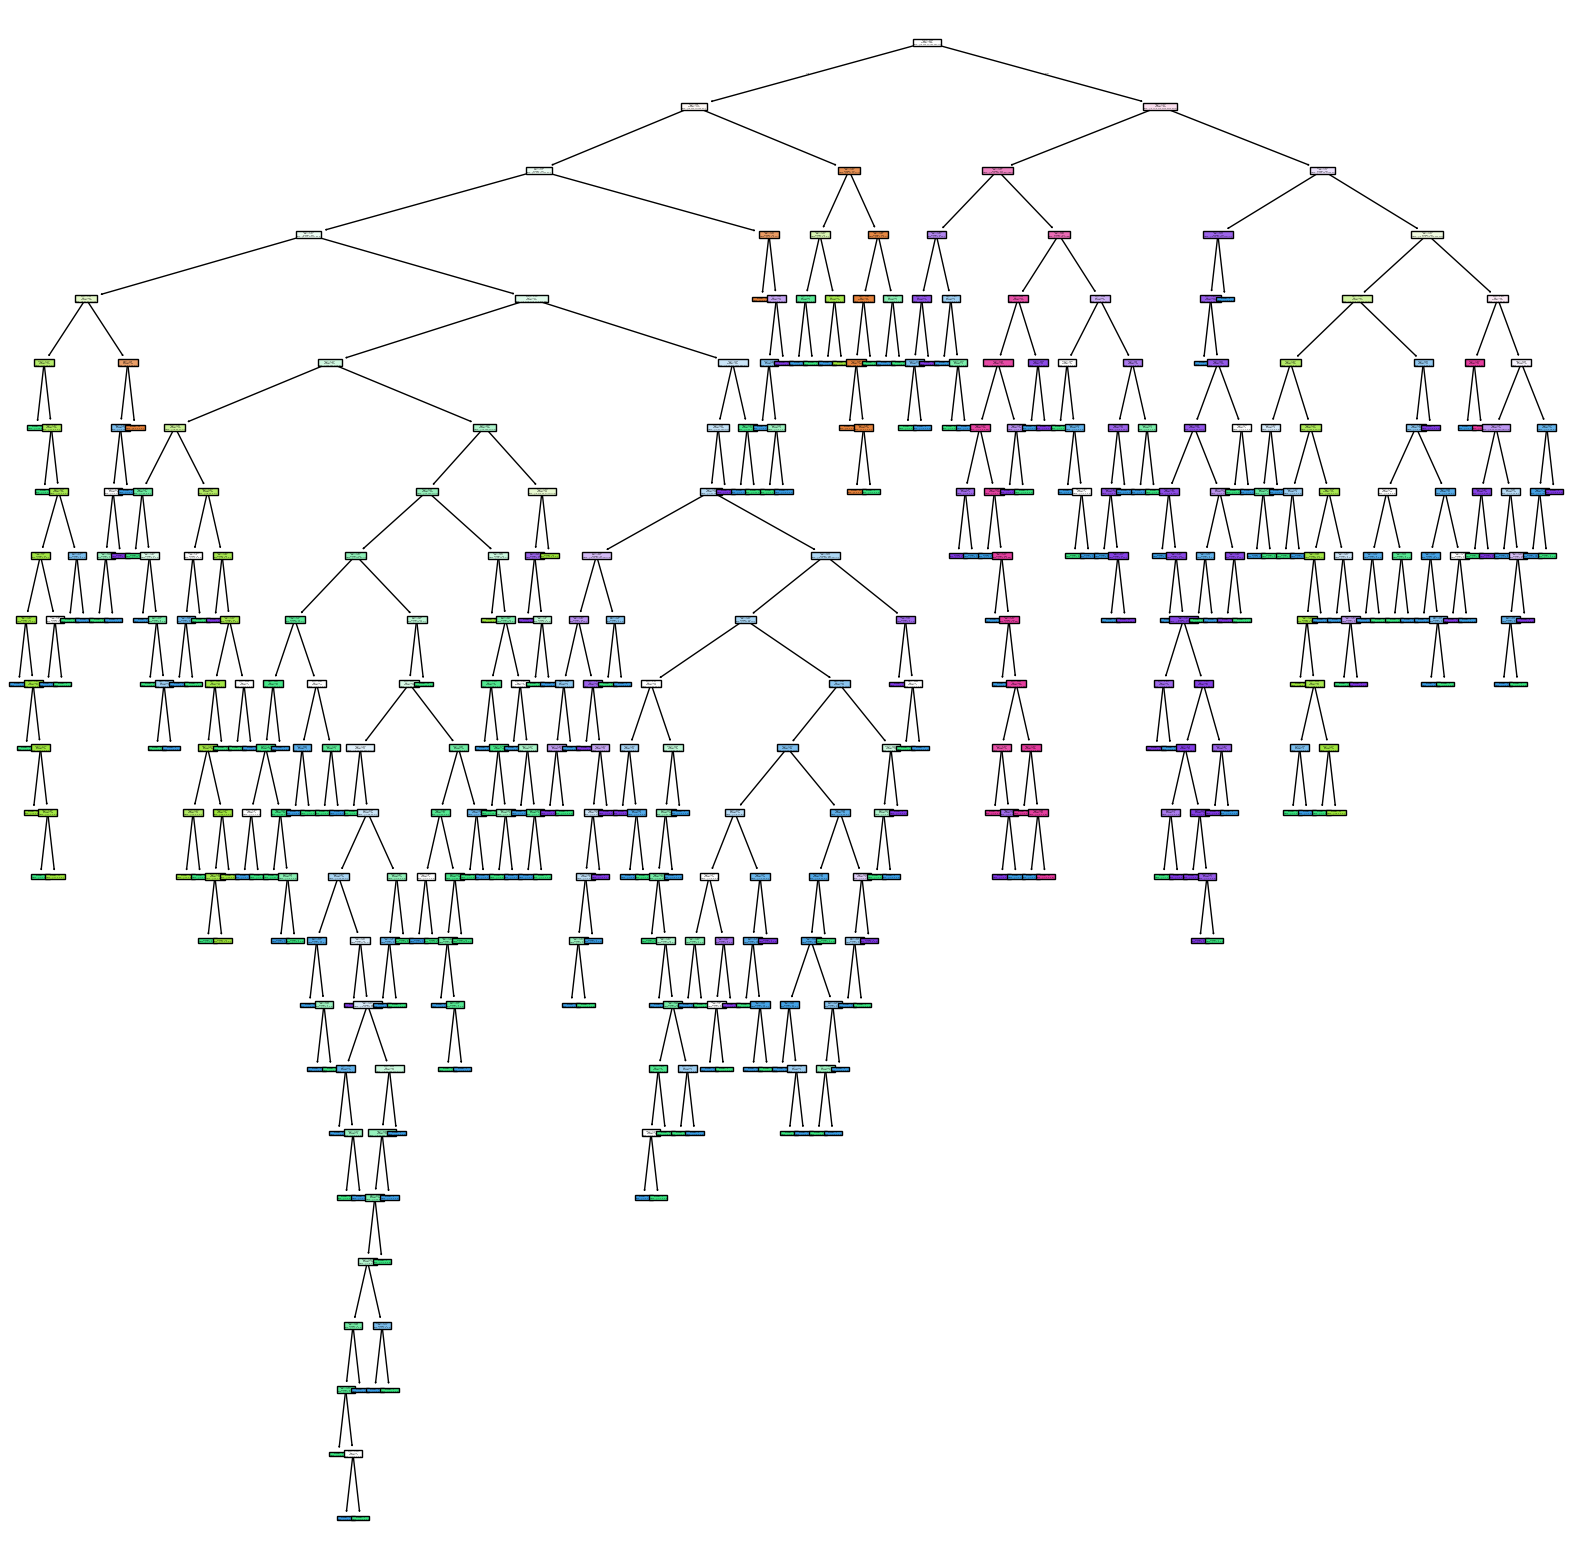

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(m1, filled=True)

In [ ]:
from scipy.stats import randint
param =  {
    "min_samples_split" : range(1, 6),
    "min_samples_leaf" : range(1, 6),
    "max_depth" : range(10, 30),
    'criterion' : ['gini', 'entropy']
}


In [ ]:
from sklearn.model_selection import GridSearchCV
para=GridSearchCV(m1, param_grid=param, cv=10, n_jobs=-1, verbose=1)
para.fit(x_train_2, y_train_2)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2000 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 30),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 6)},
             verbose=1)

In [ ]:
para.best_params_

{'criterion': 'gini',
 'max_depth': 29,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
m1_new = DecisionTreeClassifier(
    criterion='gini',
    max_depth=29,
    min_samples_leaf=1,
    min_samples_split=2
)
m1_new.fit(x_train_2, y_train_2)

DecisionTreeClassifier(max_depth=29)

In [ ]:
p_2= m1_new.predict(x_test_1)

In [ ]:
print("Train Accuracy:", m1.score(x_train_2, y_train_2))
print("Test Accuracy:", m1.score(x_test_1, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.5645645645645646


In [ ]:
print("Train Accuracy:", m1_new.score(x_train_2, y_train_2))
print("Test Accuracy:", m1_new.score(x_test_1, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.5885885885885885


In [ ]:
p_2

array([6, 5, 5, 6, 5, 7, 6, 7, 7, 6, 5, 6, 6, 5, 7, 6, 6, 7, 5, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5,
       7, 5, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 7, 6, 5, 6, 5, 6, 3, 5, 6, 5, 5, 5, 6, 6, 6, 7, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7, 5,
       6, 5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 5, 6, 6,
       5, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 7, 5,
       4, 6, 5, 7, 7, 6, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5,
       5, 6, 6, 5, 7, 6, 6, 6, 5, 5, 4, 6, 6, 5, 5, 5, 5, 5, 7, 5, 6, 5,
       5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 7, 6, 6, 7, 5, 5, 6, 6,
       6, 6, 6, 6, 7, 5, 5, 5, 5, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 6, 7, 6, 6, 5, 7, 6, 6, 6, 6, 4, 6, 6, 6, 5, 5, 5, 6,
       7, 6, 4, 5, 5, 5, 5, 6, 6, 6, 5, 4, 5, 6, 5, 5, 5, 5, 5, 5, 7, 7,
       5, 5, 5, 5, 8, 6, 6, 5, 5, 6, 6, 6, 7, 6, 7,

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train_2, y_train_2)

RandomForestClassifier(n_estimators=50)

In [ ]:
rf.score(x_test_1, y_test) #averageaccuracy

0.6126126126126126

In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=233805566),
 DecisionTreeClassifier(max_features='sqrt', random_state=2044364202),
 DecisionTreeClassifier(max_features='sqrt', random_state=2002835621),
 DecisionTreeClassifier(max_features='sqrt', random_state=1349906608),
 DecisionTreeClassifier(max_features='sqrt', random_state=1304854229),
 DecisionTreeClassifier(max_features='sqrt', random_state=21931290),
 DecisionTreeClassifier(max_features='sqrt', random_state=179687910),
 DecisionTreeClassifier(max_features='sqrt', random_state=1933920876),
 DecisionTreeClassifier(max_features='sqrt', random_state=1904206834),
 DecisionTreeClassifier(max_features='sqrt', random_state=953340476),
 DecisionTreeClassifier(max_features='sqrt', random_state=71724406),
 DecisionTreeClassifier(max_features='sqrt', random_state=1067929871),
 DecisionTreeClassifier(max_features='sqrt', random_state=1911585300),
 DecisionTreeClassifier(max_features='sqrt', random_state=843464209),
 DecisionTreeC

In [ ]:
p2=rf.predict(x_test)
print(p2)

[6 5 5 6 6 7 5 6 7 6 5 6 5 6 6 6 5 6 6 6 5 5 6 5 6 5 6 6 6 5 5 7 6 6 5 7 6
 5 6 6 5 6 5 5 7 5 5 6 5 5 5 6 6 6 6 5 6 5 6 5 5 5 5 5 5 6 5 6 5 6 7 6 6 6
 6 5 6 6 5 6 5 5 5 6 5 6 6 6 5 5 5 5 6 5 5 7 5 7 7 5 5 5 5 5 7 6 6 6 6 5 6
 5 6 5 6 6 5 5 6 6 5 6 5 6 6 6 5 6 7 5 6 5 6 6 6 6 6 5 6 7 5 5 5 5 6 5 5 6
 6 6 5 6 7 5 6 6 4 6 7 5 5 5 5 5 5 5 6 5 5 5 6 6 6 5 6 5 5 5 5 5 7 5 5 7 6
 5 5 6 5 7 5 5 5 5 6 5 5 5 5 6 5 5 6 6 6 6 7 5 5 5 6 5 6 5 6 7 5 5 5 6 6 6
 6 6 6 5 5 6 5 5 5 6 6 6 5 6 6 5 7 6 5 6 5 6 5 5 7 7 6 6 5 5 6 6 5 6 5 6 6
 5 5 6 5 6 6 5 5 6 5 5 5 6 5 5 5 5 5 6 5 5 5 5 5 5 6 7 6 5 5 5 6 7 6 6 5 5
 6 5 7 6 6 7 5 5 5 7 7 5 6 5 7 6 7 5 5 6 5 6 5 5 5 7 6 5 6 6 5 5 6 6 7 6 5]
